In [ ]:
# Homework 1
# Cancer Diagnosis Using Machine Learning 
# Due Date: February 19th, 2025

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")

# Display columns in dataset
print(df.columns)

In [15]:
# Use sklearn functions to split the dataset into testing and training sets with the following parameters:
# test_size=0.3, random_state=2

from sklearn.model_selection import train_test_split

# Define features X and labels y
X = df.drop(columns=['Malignant_Cancer'])  # Drop the target column
y = df['Malignant_Cancer']  # Select the target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Check the shape of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((105, 9), (45, 9), (105,), (45,))

In [23]:
# Use "Decision Tree Classifier" to predict cancer based on the training/testing dataset. 
# Calculate and report accuracy and AUC of your classifier. 
# Plot the ROC curve. 

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train the decision tree
my_decisiontree = DecisionTreeClassifier(random_state=2)
my_decisiontree.fit(X_train, y_train)

# Make predictions
y_predict = my_decisiontree.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_predict) 

# Compute AUC 
y_prob_dt = my_decisiontree.predict_proba(X_test)[:, 1]  
auc = roc_auc_score(y_test, y_prob_dt)

# Print results
print("Accuracy:", accuracy)
print("AUC:", auc)


Accuracy: 0.8666666666666667
AUC: 0.8697478991596639


In [17]:
# Bagging Implementation with 29 Decision Trees
# 
# This code implements Bagging (Bootstrap Aggregating) without using scikit-learn's built-in BaggingClassifier. 
# We train 29 individual Decision Tree classifiers on different bootstrapped subsets of the training data 
# and combine their predictions using majority voting.
# 
# Steps:
# 1. Generate 29 bootstrapped training datasets (each containing 80% of X_train).
# 2. Train a new Decision Tree classifier on each bootstrapped dataset.
# 3. Predict on the original test set (X_test) and store the predictions.
# 4. Perform majority voting across all classifiers to determine the final prediction.
# 5. Compute the mean probability for AUC calculation.
# 6. Report the final accuracy and AUC of the Bagging ensemble.
# 
# The final predictions are based on the majority vote across all classifiers, 
# and the probability for the AUC calculation is obtained by averaging the predicted probabilities.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load dataset again
df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")

# Verify the first few rows
print(df.head())

# Define features and labels
X = df.drop(columns=['Malignant_Cancer'])  # Adjust target column name
y = df['Malignant_Cancer']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Parameters
num_classifiers = 29
bootstrap_size = int(0.8 * len(X_train))

# Store predictions
predictions_list = []
probabilities_list = []

# Bagging process
for i in range(num_classifiers):
    # Bootstrap sample
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=bootstrap_size, random_state=i, replace=True)

    # Train Decision Tree
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(X_resampled, y_resampled)

    # Predict on X_test
    y_pred = Base_DecisionTree.predict(X_test)
    y_prob_dt = Base_DecisionTree.predict_proba(X_test)[:, 1]

    # Store predictions
    predictions_list.append(y_pred)
    probabilities_list.append(y_prob)

# Convert lists to arrays
predictions = np.array(predictions_list)
probabilities = np.array(probabilities_list)

# Majority voting (final prediction)
final_predictions = np.round(np.mean(predictions, axis=0))

# Mean probability for AUC
final_probabilities = np.mean(probabilities, axis=0)

# Compute Accuracy and AUC
accuracy = accuracy_score(y_test, final_predictions)
auc = roc_auc_score(y_test, final_probabilities)

print("Bagging Accuracy:", accuracy)
print("Bagging AUC:", auc)


   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Malignant_Cancer  
0                3                1        1                 0  
1                3                

In [25]:
# Use scikit-learn "Adaboost" classifier to predict cancer 
# based on the training/testing datasets that you built in ptB
# Then, calculate and report the accuracy and AUC of your classifier.

from sklearn.ensemble import AdaBoostClassifier  
import numpy as np
import pandas as pd

# Load dataset again
df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")

# Verify the first few rows
print(df.head())

# Define features and labels
X = df.drop(columns=['Malignant_Cancer'])  
y = df['Malignant_Cancer']

# Initialize AdaBoost classifier
my_AdaBoost = AdaBoostClassifier(n_estimators=29, random_state=2)

# Train AdaBoost
my_AdaBoost.fit(X_train, y_train)

   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Malignant_Cancer  
0                3                1        1                 0  
1                3                

In [7]:
# Gradient Boosting with its popular and super efficient implementation "XGBoost" that stands for "Extreme Gradient Boosting"
from xgboost import XGBClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

# Load dataset again
df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")

print(df.head())

# Define features and labels
X = df.drop(columns=['Malignant_Cancer'])  
y = df['Malignant_Cancer']

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Train Adaboost
my_XGBoost.fit(X_train, y_train)

# Preidct on test set
y_pred = my_XGBoost.predict(X_test)

# Compute accuracy and AUC
accuracy = accuracy_score(y_test, y_pred)
y_prob_xgb = my_XGBoost.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob_xgb)

print("XGBoost:", accuracy)
print("AUC:", auc)


   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Malignant_Cancer  
0                3                1        1                 0  
1                3                

In [5]:
import xgboost as xgb
print("XGBoost is installed successfully!")


XGBoost is installed successfully!


In [11]:
# Use Scikit-learn "Random Forest" classifier to predict cancer based on the training/test datsets 
# Calculate and report the accuracy AUC of your classifier.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

# Load dataset again
df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")

# Verify the first few rows
print(df.head())

# Define features and labels
X = df.drop(columns=['Malignant_Cancer'])  # Adjust target column name
y = df['Malignant_Cancer']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Compute probability score 
y_prob_rf = my_RandomForest.predict_proba(X_test)[:, 1]

# Initialize and train the Random Forest model
my_RandomForest = RandomForestClassifier(n_estimators = 9, bootstrap = True, random_state = 2)
my_RandomForest.fit(X_train, y_train)

# Print results
print("Accuracy", accuracy)
print("AUC", auc)

   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Malignant_Cancer  
0                3                1        1                 0  
1                3                

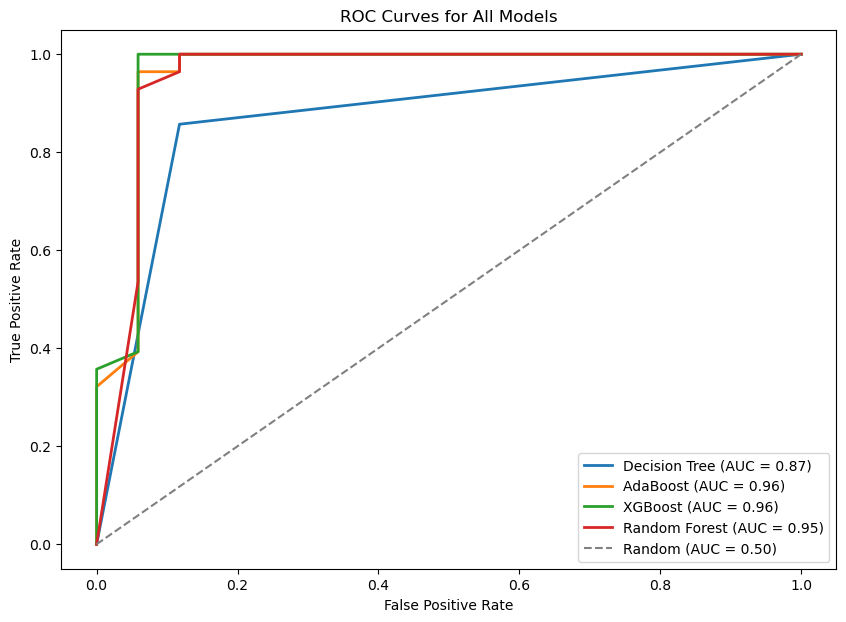

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute probability scores for AUC calculation
y_prob_dt = my_decisiontree.predict_proba(X_test)[:, 1] 
y_prob_ada = my_AdaBoost.predict_proba(X_test)[:, 1]
y_prob_xgb = my_XGBoost.predict_proba(X_test)[:, 1]  
y_prob_rf = my_RandomForest.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for all models
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
auc_ada = auc(fpr_ada, tpr_ada)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb) 
auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Store FPR, TPR, and AUC values for plotting
models = {
    "Decision Tree": {"fpr": fpr_dt, "tpr": tpr_dt, "auc": auc_dt},
    "AdaBoost": {"fpr": fpr_ada, "tpr": tpr_ada, "auc": auc_ada},
    "XGBoost": {"fpr": fpr_xgb, "tpr": tpr_xgb, "auc": auc_xgb},
    "Random Forest": {"fpr": fpr_rf, "tpr": tpr_rf, "auc": auc_rf},
}

# Plot all ROC curves
plt.figure(figsize=(10, 7))
for model_name, values in models.items():
    plt.plot(values["fpr"], values["tpr"], lw=2, label=f"{model_name} (AUC = {values['auc']:.2f})")

# Plot random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random (AUC = 0.50)")

# Labels, Title, and Legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")

# Show plot
plt.show()
